# Assignment X: Neural Language Model

## Question 1

Use the same simple dataset (as shown below) discussed in class and create a simple **trigram-based** neural language using sequence models.


```
# source text
data = """ Jack and Jill went up the hill\n
		To fetch a pail of water\n
		Jack fell down and broke his crown\n
		And Jill came tumbling after\n """
```

### Trigram Model

In [ ]:
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical, plot_model
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding



# generate a sequence from a language model
def generate_seq(model, tokenizer, max_length, seed_text, n_words):
    in_text = seed_text
    # generate a fixed number of words
    for _ in range(n_words):
        # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        # pre-pad sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=max_length, padding='pre')
        # predict probabilities for each word
        yhat = np.argmax(model.predict(encoded), axis=-1)
#         yhat = model.predict_classes(encoded, verbose=0)
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
        # append to input
        in_text += ' ' + out_word
    return in_text

# source text
data = """ Jack and Jill went up the hill\n
		To fetch a pail of water\n
		Jack fell down and broke his crown\n
		And Jill came tumbling after\n """

data = [l.strip() for l in data.split('\n') if l!=""]



In [ ]:
# integer encode sequences of words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)
encoded = tokenizer.texts_to_sequences(data)
# retrieve vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# encode 2 words -> 1 word
sequences = list()
for line in encoded:
    for i in range(2, len(line)):
        sequence = line[i - 2:i + 1]
        sequences.append(sequence)
print('Total Sequences: %d' % len(sequences))
# pad sequences
max_length = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_length, padding='pre')
print('Max Sequence Length: %d' % max_length)
# split into input and output elements
sequences = array(sequences)
X, y = sequences[:, :-1], sequences[:, -1]
y = to_categorical(y, num_classes=vocab_size)

Vocabulary Size: 22
Total Sequences: 17


In [ ]:
sequences

[[2, 1, 3],
 [1, 3, 4],
 [3, 4, 5],
 [4, 5, 6],
 [5, 6, 7],
 [8, 9, 10],
 [9, 10, 11],
 [10, 11, 12],
 [11, 12, 13],
 [2, 14, 15],
 [14, 15, 1],
 [15, 1, 16],
 [1, 16, 17],
 [16, 17, 18],
 [1, 3, 19],
 [3, 19, 20],
 [19, 20, 21]]

In [ ]:

# define model
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=max_length - 1))
model.add(LSTM(50))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())
# compile network
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# fit network
model.fit(X, y, epochs=500, verbose=2)

Max Sequence Length: 3
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 2, 10)             220       
_________________________________________________________________
lstm_17 (LSTM)               (None, 50)                12200     
_________________________________________________________________
dense_7 (Dense)              (None, 22)                1122      
Total params: 13,542
Trainable params: 13,542
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
1/1 - 2s - loss: 3.0905 - accuracy: 0.0588
Epoch 2/500
1/1 - 0s - loss: 3.0892 - accuracy: 0.1176
Epoch 3/500
1/1 - 0s - loss: 3.0878 - accuracy: 0.1176
Epoch 4/500
1/1 - 0s - loss: 3.0865 - accuracy: 0.1176
Epoch 5/500
1/1 - 0s - loss: 3.0851 - accuracy: 0.1176
Epoch 6/500
1/1 - 0s - loss: 3.0837 - accuracy: 0.1765
Epoch 7/500
1/1 - 0s -

Epoch 133/500
1/1 - 0s - loss: 1.5623 - accuracy: 0.7059
Epoch 134/500
1/1 - 0s - loss: 1.5444 - accuracy: 0.7647
Epoch 135/500
1/1 - 0s - loss: 1.5267 - accuracy: 0.7647
Epoch 136/500
1/1 - 0s - loss: 1.5091 - accuracy: 0.8235
Epoch 137/500
1/1 - 0s - loss: 1.4918 - accuracy: 0.8235
Epoch 138/500
1/1 - 0s - loss: 1.4745 - accuracy: 0.8235
Epoch 139/500
1/1 - 0s - loss: 1.4574 - accuracy: 0.8235
Epoch 140/500
1/1 - 0s - loss: 1.4405 - accuracy: 0.8235
Epoch 141/500
1/1 - 0s - loss: 1.4238 - accuracy: 0.8235
Epoch 142/500
1/1 - 0s - loss: 1.4072 - accuracy: 0.8824
Epoch 143/500
1/1 - 0s - loss: 1.3907 - accuracy: 0.8824
Epoch 144/500
1/1 - 0s - loss: 1.3744 - accuracy: 0.8824
Epoch 145/500
1/1 - 0s - loss: 1.3583 - accuracy: 0.8824
Epoch 146/500
1/1 - 0s - loss: 1.3423 - accuracy: 0.8824
Epoch 147/500
1/1 - 0s - loss: 1.3264 - accuracy: 0.8824
Epoch 148/500
1/1 - 0s - loss: 1.3106 - accuracy: 0.8824
Epoch 149/500
1/1 - 0s - loss: 1.2950 - accuracy: 0.8824
Epoch 150/500
1/1 - 0s - loss: 

Epoch 277/500
1/1 - 0s - loss: 0.1853 - accuracy: 0.9412
Epoch 278/500
1/1 - 0s - loss: 0.1833 - accuracy: 0.9412
Epoch 279/500
1/1 - 0s - loss: 0.1814 - accuracy: 0.9412
Epoch 280/500
1/1 - 0s - loss: 0.1796 - accuracy: 0.9412
Epoch 281/500
1/1 - 0s - loss: 0.1778 - accuracy: 0.9412
Epoch 282/500
1/1 - 0s - loss: 0.1760 - accuracy: 0.9412
Epoch 283/500
1/1 - 0s - loss: 0.1743 - accuracy: 0.9412
Epoch 284/500
1/1 - 0s - loss: 0.1727 - accuracy: 0.9412
Epoch 285/500
1/1 - 0s - loss: 0.1710 - accuracy: 0.9412
Epoch 286/500
1/1 - 0s - loss: 0.1695 - accuracy: 0.9412
Epoch 287/500
1/1 - 0s - loss: 0.1679 - accuracy: 0.9412
Epoch 288/500
1/1 - 0s - loss: 0.1664 - accuracy: 0.9412
Epoch 289/500
1/1 - 0s - loss: 0.1649 - accuracy: 0.9412
Epoch 290/500
1/1 - 0s - loss: 0.1635 - accuracy: 0.9412
Epoch 291/500
1/1 - 0s - loss: 0.1621 - accuracy: 0.9412
Epoch 292/500
1/1 - 0s - loss: 0.1608 - accuracy: 0.9412
Epoch 293/500
1/1 - 0s - loss: 0.1594 - accuracy: 0.9412
Epoch 294/500
1/1 - 0s - loss: 

Epoch 421/500
1/1 - 0s - loss: 0.1011 - accuracy: 0.9412
Epoch 422/500
1/1 - 0s - loss: 0.1009 - accuracy: 0.9412
Epoch 423/500
1/1 - 0s - loss: 0.1008 - accuracy: 0.9412
Epoch 424/500
1/1 - 0s - loss: 0.1006 - accuracy: 0.9412
Epoch 425/500
1/1 - 0s - loss: 0.1005 - accuracy: 0.9412
Epoch 426/500
1/1 - 0s - loss: 0.1004 - accuracy: 0.9412
Epoch 427/500
1/1 - 0s - loss: 0.1002 - accuracy: 0.9412
Epoch 428/500
1/1 - 0s - loss: 0.1001 - accuracy: 0.9412
Epoch 429/500
1/1 - 0s - loss: 0.1000 - accuracy: 0.9412
Epoch 430/500
1/1 - 0s - loss: 0.0999 - accuracy: 0.9412
Epoch 431/500
1/1 - 0s - loss: 0.0997 - accuracy: 0.9412
Epoch 432/500
1/1 - 0s - loss: 0.0996 - accuracy: 0.9412
Epoch 433/500
1/1 - 0s - loss: 0.0995 - accuracy: 0.9412
Epoch 434/500
1/1 - 0s - loss: 0.0994 - accuracy: 0.9412
Epoch 435/500
1/1 - 0s - loss: 0.0992 - accuracy: 0.9412
Epoch 436/500
1/1 - 0s - loss: 0.0991 - accuracy: 0.9412
Epoch 437/500
1/1 - 0s - loss: 0.0990 - accuracy: 0.9412
Epoch 438/500
1/1 - 0s - loss: 

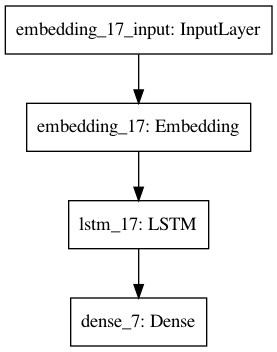

In [ ]:
plot_model(model)

In [ ]:
# evaluate model
print(generate_seq(model, tokenizer, max_length-1, 'Jack and', 5))
print(generate_seq(model, tokenizer, max_length-1, 'And Jill', 3))
print(generate_seq(model, tokenizer, max_length-1, 'fell down', 5))
print(generate_seq(model, tokenizer, max_length-1, 'pail of', 5))

Jack and jill went up the hill
And Jill went up the
fell down and broke his crown and
pail of water and broke his crown


## Question 2

Use the same simple dataset and create a simple line-based neural language model using sequence models.

For example, given the first line, `Jack and Jill went up the hill`, you need to include all possible sequences from this line as inputs for your neural language model training, including all bigrams, trigrams, ..., ngrams combinations (see below)

```
# source text
data = """Jack and Jill went up the hill\n
		To fetch a pail of water\n
		Jack fell down and broke his crown\n
		And Jill came tumbling after\n"""
```

```
## seqeunces as inputs from line 2
['To', 'fetch']
['To', 'fetch', 'a']
['To', 'fetch', 'a', 'pail']
['To', 'fetch', 'a', 'pail', 'of']
['To', 'fetch', 'a', 'pail', 'of', 'water']

```

### Line-based Model

In [ ]:
tokenizer.word_index

{1: 1,
 'and': 2,
 'jack': 3,
 'jill': 4,
 'went': 5,
 'up': 6,
 'the': 7,
 'hill': 8,
 'to': 9,
 'fetch': 10,
 'a': 11,
 'pail': 12,
 'of': 13,
 'water': 14,
 'fell': 15,
 'down': 16,
 'broke': 17,
 'his': 18,
 'crown': 19,
 'came': 20,
 'tumbling': 21,
 'after': 22}

In [ ]:
from numpy import array
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Attention, Input, GlobalAveragePooling1D



# source text
data = """Jack and Jill went up the hill\n
            To fetch a pail of water\n
            Jack fell down and broke his crown\n
            And Jill came tumbling after\n"""

data = [l.strip() for l in data.split('\n') if l!=""]
# prepare the tokenizer on the source text
tokenizer = Tokenizer(oov_token=1, char_level=False, split=' ')  ## specify the word id for unknown words
tokenizer.fit_on_texts(data)

# determine the vocabulary size
## zero index is reserved in keras as the padding token (+1) and one unknown word id
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# create line-based sequences
sequences = list()
for line in data:
    encoded = tokenizer.texts_to_sequences([line])[0]
    ## For each line, after converting words into indexes
    ## prepare sequences for training
    ## given a line, w1,w2,w3,w4
    ## create input sequences:
    ## w1,w2
    ## w1,w2,w3
    ## w1,w2,w3,w4
    for i in range(1, len(encoded)):
        sequence = encoded[:i + 1]
        sequences.append(sequence)
print('Total Sequences: %d' % len(sequences))

Vocabulary Size: 23
Total Sequences: 21


In [ ]:
# pad input sequences
max_length = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_length, padding='pre')
print('Max Sequence Length: %d' % max_length)

# split into input and output elements
sequences = array(sequences)
X, y = sequences[:, :-1], sequences[:, -1]
y = to_categorical(y, num_classes=vocab_size)
# define model
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=max_length - 1))
model.add(LSTM(50))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())
# compile network
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# fit network
model.fit(X, y, epochs=500, verbose=2)

Max Sequence Length: 7
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 6, 10)             230       
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                12200     
_________________________________________________________________
dense_1 (Dense)              (None, 23)                1173      
Total params: 13,603
Trainable params: 13,603
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
1/1 - 2s - loss: 3.1355 - accuracy: 0.0952
Epoch 2/500
1/1 - 0s - loss: 3.1339 - accuracy: 0.1429
Epoch 3/500
1/1 - 0s - loss: 3.1324 - accuracy: 0.1905
Epoch 4/500
1/1 - 0s - loss: 3.1308 - accuracy: 0.1429
Epoch 5/500
1/1 - 0s - loss: 3.1292 - accuracy: 0.1429
Epoch 6/500
1/1 - 0s - loss: 3.1275 - accuracy: 0.1429
Epoch 7/500
1/1 - 0s -

Epoch 133/500
1/1 - 0s - loss: 1.1604 - accuracy: 0.7619
Epoch 134/500
1/1 - 0s - loss: 1.1445 - accuracy: 0.7619
Epoch 135/500
1/1 - 0s - loss: 1.1288 - accuracy: 0.7619
Epoch 136/500
1/1 - 0s - loss: 1.1133 - accuracy: 0.7619
Epoch 137/500
1/1 - 0s - loss: 1.0981 - accuracy: 0.7619
Epoch 138/500
1/1 - 0s - loss: 1.0832 - accuracy: 0.7619
Epoch 139/500
1/1 - 0s - loss: 1.0685 - accuracy: 0.7619
Epoch 140/500
1/1 - 0s - loss: 1.0541 - accuracy: 0.7619
Epoch 141/500
1/1 - 0s - loss: 1.0400 - accuracy: 0.7619
Epoch 142/500
1/1 - 0s - loss: 1.0261 - accuracy: 0.7619
Epoch 143/500
1/1 - 0s - loss: 1.0124 - accuracy: 0.8095
Epoch 144/500
1/1 - 0s - loss: 0.9990 - accuracy: 0.7619
Epoch 145/500
1/1 - 0s - loss: 0.9859 - accuracy: 0.8095
Epoch 146/500
1/1 - 0s - loss: 0.9737 - accuracy: 0.8095
Epoch 147/500
1/1 - 0s - loss: 0.9626 - accuracy: 0.8095
Epoch 148/500
1/1 - 0s - loss: 0.9504 - accuracy: 0.8095
Epoch 149/500
1/1 - 0s - loss: 0.9360 - accuracy: 0.8571
Epoch 150/500
1/1 - 0s - loss: 

Epoch 277/500
1/1 - 0s - loss: 0.3200 - accuracy: 0.9524
Epoch 278/500
1/1 - 0s - loss: 0.3176 - accuracy: 0.9524
Epoch 279/500
1/1 - 0s - loss: 0.3152 - accuracy: 0.9524
Epoch 280/500
1/1 - 0s - loss: 0.3129 - accuracy: 0.9524
Epoch 281/500
1/1 - 0s - loss: 0.3106 - accuracy: 0.9524
Epoch 282/500
1/1 - 0s - loss: 0.3083 - accuracy: 0.9524
Epoch 283/500
1/1 - 0s - loss: 0.3060 - accuracy: 0.9524
Epoch 284/500
1/1 - 0s - loss: 0.3038 - accuracy: 0.9524
Epoch 285/500
1/1 - 0s - loss: 0.3015 - accuracy: 0.9524
Epoch 286/500
1/1 - 0s - loss: 0.2993 - accuracy: 0.9524
Epoch 287/500
1/1 - 0s - loss: 0.2971 - accuracy: 0.9524
Epoch 288/500
1/1 - 0s - loss: 0.2949 - accuracy: 0.9524
Epoch 289/500
1/1 - 0s - loss: 0.2927 - accuracy: 0.9524
Epoch 290/500
1/1 - 0s - loss: 0.2905 - accuracy: 0.9524
Epoch 291/500
1/1 - 0s - loss: 0.2884 - accuracy: 0.9524
Epoch 292/500
1/1 - 0s - loss: 0.2863 - accuracy: 0.9524
Epoch 293/500
1/1 - 0s - loss: 0.2842 - accuracy: 0.9524
Epoch 294/500
1/1 - 0s - loss: 

Epoch 421/500
1/1 - 0s - loss: 0.1286 - accuracy: 0.9524
Epoch 422/500
1/1 - 0s - loss: 0.1281 - accuracy: 0.9524
Epoch 423/500
1/1 - 0s - loss: 0.1276 - accuracy: 0.9524
Epoch 424/500
1/1 - 0s - loss: 0.1271 - accuracy: 0.9524
Epoch 425/500
1/1 - 0s - loss: 0.1266 - accuracy: 0.9524
Epoch 426/500
1/1 - 0s - loss: 0.1261 - accuracy: 0.9524
Epoch 427/500
1/1 - 0s - loss: 0.1256 - accuracy: 0.9524
Epoch 428/500
1/1 - 0s - loss: 0.1251 - accuracy: 0.9524
Epoch 429/500
1/1 - 0s - loss: 0.1246 - accuracy: 0.9524
Epoch 430/500
1/1 - 0s - loss: 0.1241 - accuracy: 0.9524
Epoch 431/500
1/1 - 0s - loss: 0.1237 - accuracy: 0.9524
Epoch 432/500
1/1 - 0s - loss: 0.1232 - accuracy: 0.9524
Epoch 433/500
1/1 - 0s - loss: 0.1228 - accuracy: 0.9524
Epoch 434/500
1/1 - 0s - loss: 0.1223 - accuracy: 0.9524
Epoch 435/500
1/1 - 0s - loss: 0.1219 - accuracy: 0.9524
Epoch 436/500
1/1 - 0s - loss: 0.1214 - accuracy: 0.9524
Epoch 437/500
1/1 - 0s - loss: 0.1210 - accuracy: 0.9524
Epoch 438/500
1/1 - 0s - loss: 

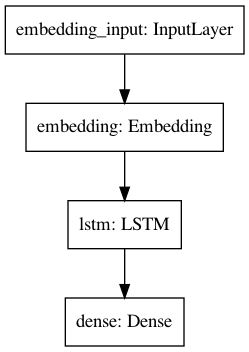

In [ ]:
plot_model(model)

In [ ]:
# evaluate model
print(generate_seq(model, tokenizer, max_length-1, 'Jack', 4))
print(generate_seq(model, tokenizer, max_length-1, 'Jill', 4))

Jack fell down and broke
Jill jill came tumbling after


In [ ]:
print(X.shape)
print(max_length)
print(vocab_size)

(21, 6)
7
23


In [ ]:
def createModel():
    inputs = Input(shape=(max_length-1,))
    inputs2 = Embedding(input_dim = vocab_size, output_dim = 10, input_length = max_length-1, mask_zero=True)(inputs)
    all_hs, last_h, _ = LSTM(50, return_sequences =True, return_state=True)(inputs2)
    all_hs_weighted = Attention()([all_hs, all_hs])
    all_hs_pooled = GlobalAveragePooling1D()(all_hs_weighted)
    y = Dense(vocab_size, activation="softmax")(all_hs_pooled)
    m = keras.Model(inputs=inputs, outputs=y)
    m.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return m

model2 = createModel()

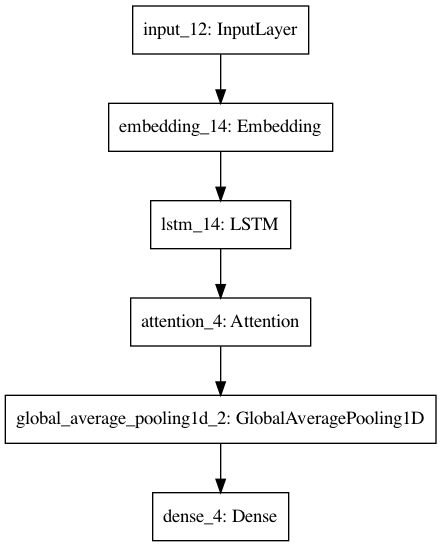

In [ ]:
plot_model(model2)


In [ ]:
model2.fit(X, y, epochs=1000, verbose=2)

Epoch 1/1000
1/1 - 0s - loss: 0.2074 - accuracy: 0.9524
Epoch 2/1000
1/1 - 0s - loss: 0.2067 - accuracy: 0.9524
Epoch 3/1000
1/1 - 0s - loss: 0.2060 - accuracy: 0.9524
Epoch 4/1000
1/1 - 0s - loss: 0.2053 - accuracy: 0.9524
Epoch 5/1000
1/1 - 0s - loss: 0.2046 - accuracy: 0.9524
Epoch 6/1000
1/1 - 0s - loss: 0.2039 - accuracy: 0.9524
Epoch 7/1000
1/1 - 0s - loss: 0.2032 - accuracy: 0.9524
Epoch 8/1000
1/1 - 0s - loss: 0.2025 - accuracy: 0.9524
Epoch 9/1000
1/1 - 0s - loss: 0.2018 - accuracy: 0.9524
Epoch 10/1000
1/1 - 0s - loss: 0.2012 - accuracy: 0.9524
Epoch 11/1000
1/1 - 0s - loss: 0.2005 - accuracy: 0.9524
Epoch 12/1000
1/1 - 0s - loss: 0.1998 - accuracy: 0.9524
Epoch 13/1000
1/1 - 0s - loss: 0.1991 - accuracy: 0.9524
Epoch 14/1000
1/1 - 0s - loss: 0.1985 - accuracy: 0.9524
Epoch 15/1000
1/1 - 0s - loss: 0.1978 - accuracy: 0.9524
Epoch 16/1000
1/1 - 0s - loss: 0.1972 - accuracy: 0.9524
Epoch 17/1000
1/1 - 0s - loss: 0.1965 - accuracy: 0.9524
Epoch 18/1000
1/1 - 0s - loss: 0.1959 - 

1/1 - 0s - loss: 0.1389 - accuracy: 0.9524
Epoch 145/1000
1/1 - 0s - loss: 0.1386 - accuracy: 0.9524
Epoch 146/1000
1/1 - 0s - loss: 0.1383 - accuracy: 0.9524
Epoch 147/1000
1/1 - 0s - loss: 0.1380 - accuracy: 0.9524
Epoch 148/1000
1/1 - 0s - loss: 0.1378 - accuracy: 0.9524
Epoch 149/1000
1/1 - 0s - loss: 0.1375 - accuracy: 0.9524
Epoch 150/1000
1/1 - 0s - loss: 0.1372 - accuracy: 0.9524
Epoch 151/1000
1/1 - 0s - loss: 0.1369 - accuracy: 0.9524
Epoch 152/1000
1/1 - 0s - loss: 0.1367 - accuracy: 0.9524
Epoch 153/1000
1/1 - 0s - loss: 0.1364 - accuracy: 0.9524
Epoch 154/1000
1/1 - 0s - loss: 0.1361 - accuracy: 0.9524
Epoch 155/1000
1/1 - 0s - loss: 0.1358 - accuracy: 0.9524
Epoch 156/1000
1/1 - 0s - loss: 0.1356 - accuracy: 0.9524
Epoch 157/1000
1/1 - 0s - loss: 0.1353 - accuracy: 0.9524
Epoch 158/1000
1/1 - 0s - loss: 0.1350 - accuracy: 0.9524
Epoch 159/1000
1/1 - 0s - loss: 0.1347 - accuracy: 0.9524
Epoch 160/1000
1/1 - 0s - loss: 0.1345 - accuracy: 0.9524
Epoch 161/1000
1/1 - 0s - los

Epoch 286/1000
1/1 - 0s - loss: 0.1097 - accuracy: 0.9524
Epoch 287/1000
1/1 - 0s - loss: 0.1096 - accuracy: 0.9524
Epoch 288/1000
1/1 - 0s - loss: 0.1095 - accuracy: 0.9524
Epoch 289/1000
1/1 - 0s - loss: 0.1093 - accuracy: 0.9524
Epoch 290/1000
1/1 - 0s - loss: 0.1092 - accuracy: 0.9524
Epoch 291/1000
1/1 - 0s - loss: 0.1091 - accuracy: 0.9524
Epoch 292/1000
1/1 - 0s - loss: 0.1089 - accuracy: 0.9524
Epoch 293/1000
1/1 - 0s - loss: 0.1088 - accuracy: 0.9524
Epoch 294/1000
1/1 - 0s - loss: 0.1087 - accuracy: 0.9524
Epoch 295/1000
1/1 - 0s - loss: 0.1086 - accuracy: 0.9524
Epoch 296/1000
1/1 - 0s - loss: 0.1084 - accuracy: 0.9524
Epoch 297/1000
1/1 - 0s - loss: 0.1083 - accuracy: 0.9524
Epoch 298/1000
1/1 - 0s - loss: 0.1082 - accuracy: 0.9524
Epoch 299/1000
1/1 - 0s - loss: 0.1081 - accuracy: 0.9524
Epoch 300/1000
1/1 - 0s - loss: 0.1079 - accuracy: 0.9524
Epoch 301/1000
1/1 - 0s - loss: 0.1078 - accuracy: 0.9524
Epoch 302/1000
1/1 - 0s - loss: 0.1077 - accuracy: 0.9524
Epoch 303/1000

1/1 - 0s - loss: 0.0960 - accuracy: 0.9524
Epoch 428/1000
1/1 - 0s - loss: 0.0959 - accuracy: 0.9524
Epoch 429/1000
1/1 - 0s - loss: 0.0959 - accuracy: 0.9524
Epoch 430/1000
1/1 - 0s - loss: 0.0958 - accuracy: 0.9524
Epoch 431/1000
1/1 - 0s - loss: 0.0957 - accuracy: 0.9524
Epoch 432/1000
1/1 - 0s - loss: 0.0957 - accuracy: 0.9524
Epoch 433/1000
1/1 - 0s - loss: 0.0956 - accuracy: 0.9524
Epoch 434/1000
1/1 - 0s - loss: 0.0955 - accuracy: 0.9524
Epoch 435/1000
1/1 - 0s - loss: 0.0954 - accuracy: 0.9524
Epoch 436/1000
1/1 - 0s - loss: 0.0954 - accuracy: 0.9524
Epoch 437/1000
1/1 - 0s - loss: 0.0953 - accuracy: 0.9524
Epoch 438/1000
1/1 - 0s - loss: 0.0952 - accuracy: 0.9524
Epoch 439/1000
1/1 - 0s - loss: 0.0952 - accuracy: 0.9524
Epoch 440/1000
1/1 - 0s - loss: 0.0951 - accuracy: 0.9524
Epoch 441/1000
1/1 - 0s - loss: 0.0950 - accuracy: 0.9524
Epoch 442/1000
1/1 - 0s - loss: 0.0950 - accuracy: 0.9524
Epoch 443/1000
1/1 - 0s - loss: 0.0949 - accuracy: 0.9524
Epoch 444/1000
1/1 - 0s - los

Epoch 569/1000
1/1 - 0s - loss: 0.0880 - accuracy: 0.9524
Epoch 570/1000
1/1 - 0s - loss: 0.0880 - accuracy: 0.9524
Epoch 571/1000
1/1 - 0s - loss: 0.0879 - accuracy: 0.9524
Epoch 572/1000
1/1 - 0s - loss: 0.0879 - accuracy: 0.9524
Epoch 573/1000
1/1 - 0s - loss: 0.0879 - accuracy: 0.9524
Epoch 574/1000
1/1 - 0s - loss: 0.0878 - accuracy: 0.9524
Epoch 575/1000
1/1 - 0s - loss: 0.0878 - accuracy: 0.9524
Epoch 576/1000
1/1 - 0s - loss: 0.0877 - accuracy: 0.9524
Epoch 577/1000
1/1 - 0s - loss: 0.0877 - accuracy: 0.9524
Epoch 578/1000
1/1 - 0s - loss: 0.0876 - accuracy: 0.9524
Epoch 579/1000
1/1 - 0s - loss: 0.0876 - accuracy: 0.9524
Epoch 580/1000
1/1 - 0s - loss: 0.0875 - accuracy: 0.9524
Epoch 581/1000
1/1 - 0s - loss: 0.0875 - accuracy: 0.9524
Epoch 582/1000
1/1 - 0s - loss: 0.0875 - accuracy: 0.9524
Epoch 583/1000
1/1 - 0s - loss: 0.0874 - accuracy: 0.9524
Epoch 584/1000
1/1 - 0s - loss: 0.0874 - accuracy: 0.9524
Epoch 585/1000
1/1 - 0s - loss: 0.0873 - accuracy: 0.9524
Epoch 586/1000

Epoch 711/1000
1/1 - 0s - loss: 0.0829 - accuracy: 0.9524
Epoch 712/1000
1/1 - 0s - loss: 0.0829 - accuracy: 0.9524
Epoch 713/1000
1/1 - 0s - loss: 0.0829 - accuracy: 0.9524
Epoch 714/1000
1/1 - 0s - loss: 0.0828 - accuracy: 0.9524
Epoch 715/1000
1/1 - 0s - loss: 0.0828 - accuracy: 0.9524
Epoch 716/1000
1/1 - 0s - loss: 0.0828 - accuracy: 0.9524
Epoch 717/1000
1/1 - 0s - loss: 0.0827 - accuracy: 0.9524
Epoch 718/1000
1/1 - 0s - loss: 0.0827 - accuracy: 0.9524
Epoch 719/1000
1/1 - 0s - loss: 0.0827 - accuracy: 0.9524
Epoch 720/1000
1/1 - 0s - loss: 0.0827 - accuracy: 0.9524
Epoch 721/1000
1/1 - 0s - loss: 0.0826 - accuracy: 0.9524
Epoch 722/1000
1/1 - 0s - loss: 0.0826 - accuracy: 0.9524
Epoch 723/1000
1/1 - 0s - loss: 0.0826 - accuracy: 0.9524
Epoch 724/1000
1/1 - 0s - loss: 0.0825 - accuracy: 0.9524
Epoch 725/1000
1/1 - 0s - loss: 0.0825 - accuracy: 0.9524
Epoch 726/1000
1/1 - 0s - loss: 0.0825 - accuracy: 0.9524
Epoch 727/1000
1/1 - 0s - loss: 0.0825 - accuracy: 0.9524
Epoch 728/1000

1/1 - 0s - loss: 0.0794 - accuracy: 0.9524
Epoch 853/1000
1/1 - 0s - loss: 0.0794 - accuracy: 0.9524
Epoch 854/1000
1/1 - 0s - loss: 0.0794 - accuracy: 0.9524
Epoch 855/1000
1/1 - 0s - loss: 0.0794 - accuracy: 0.9524
Epoch 856/1000
1/1 - 0s - loss: 0.0793 - accuracy: 0.9524
Epoch 857/1000
1/1 - 0s - loss: 0.0793 - accuracy: 0.9524
Epoch 858/1000
1/1 - 0s - loss: 0.0793 - accuracy: 0.9524
Epoch 859/1000
1/1 - 0s - loss: 0.0793 - accuracy: 0.9524
Epoch 860/1000
1/1 - 0s - loss: 0.0793 - accuracy: 0.9524
Epoch 861/1000
1/1 - 0s - loss: 0.0792 - accuracy: 0.9524
Epoch 862/1000
1/1 - 0s - loss: 0.0792 - accuracy: 0.9524
Epoch 863/1000
1/1 - 0s - loss: 0.0792 - accuracy: 0.9524
Epoch 864/1000
1/1 - 0s - loss: 0.0792 - accuracy: 0.9524
Epoch 865/1000
1/1 - 0s - loss: 0.0792 - accuracy: 0.9524
Epoch 866/1000
1/1 - 0s - loss: 0.0791 - accuracy: 0.9524
Epoch 867/1000
1/1 - 0s - loss: 0.0791 - accuracy: 0.9524
Epoch 868/1000
1/1 - 0s - loss: 0.0791 - accuracy: 0.9524
Epoch 869/1000
1/1 - 0s - los

Epoch 994/1000
1/1 - 0s - loss: 0.0769 - accuracy: 0.9524
Epoch 995/1000
1/1 - 0s - loss: 0.0769 - accuracy: 0.9524
Epoch 996/1000
1/1 - 0s - loss: 0.0769 - accuracy: 0.9524
Epoch 997/1000
1/1 - 0s - loss: 0.0769 - accuracy: 0.9524
Epoch 998/1000
1/1 - 0s - loss: 0.0768 - accuracy: 0.9524
Epoch 999/1000
1/1 - 0s - loss: 0.0768 - accuracy: 0.9524
Epoch 1000/1000
1/1 - 0s - loss: 0.0768 - accuracy: 0.9524


In [ ]:
# evaluate model
print(generate_seq(model2, tokenizer, max_length-1, 'Jack', 4))
print(generate_seq(model2, tokenizer, max_length-1, 'Jill', 4))

Jack and jill went up
Jill jill came tumbling after


## Question 3

Use the Brown corpus (`nltk.corpus.brown`) to create a trigram-based neural language model.

Please use the language model to generate 50-word text sequences using the seed text "The news". Provide a few examples from your trained model.

A few important notes in data preprocessing:

- When preparing the input sequences of trigrams for model training, please make sure the trigram does not span across "sentence boundaries". You can utilize the sentence tokenization annotations provided by the `ntlk.corpus.brown.sents()`.
- The neural language model will be trained based on all trigrams that fulfill the above criterion in the entire Brown corpus.

:::{warning}
Even though the `brown` corpus is a small-size one, the input sequences of all observed trigrams may still require considerable amount of memory for processing. Some of you may not have enough memory space to store the entire inputs and outputs data. Please find your own solutions if you encounter this memory issue. (Hint: Use `generator()`).
:::

:::{warning}
When you use your trigram-based neural language model to generate sequences, please add **randomness** to the sampling of the next word. If you always ask the language model to choose the next word of highest predicted probability value, your text would be very repetitive. Please consult Ch. 8.1.4 of François Chollet's Deep Learning with Python (one of the course textbooks) for the implementation of **temperature** for this exercise.
:::

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
# import os
# os.chdir('/content/drive/MyDrive/_MySyncDrive/Repository/ENC2045/exercise-ans')
# print(os.getcwd())


In [2]:
import nltk
# nltk.download('brown')
from nltk.corpus import brown

import numpy as np
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical, plot_model
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding


# generate a sequence from a language model
def generate_seq(model, tokenizer, max_length, seed_text, n_words):
    in_text = seed_text
    # generate a fixed number of words
    for _ in range(n_words):
        # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        # pre-pad sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=max_length, padding='pre')
        # predict probabilities for each word
        yhat = np.argmax(model.predict(encoded), axis=-1)
#         yhat = model.predict_classes(encoded, verbose=0)
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
        # append to input
        in_text += ' ' + out_word
    return in_text


# generate a sequence from a language model
def generate_seq_ngram(model, tokenizer, max_length, seed_text, n_words, ngram_lm = 3, temperature=0.5):
    in_text = seed_text
    in_text_tokens = seed_text.split(' ')
    # generate a fixed number of words
    for _ in range(n_words):
        # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        # pre-pad sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=max_length, padding='pre')
        
        # predict probabilities for each word
        #yhat = np.argmax(model.predict(encoded), axis=-1)
        yhat = sample(model.predict(encoded).flatten(), temperature=temperature)
#         yhat = model.predict_classes(encoded, verbose=0)
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
        # append to input
        in_text_tokens.append(out_word)
        #in_text += ' ' + out_word
        in_text = in_text_tokens[-(ngram_lm-1):]
        #print(in_text)
    return ' '.join(in_text_tokens)

## sampling function from Challet's Deep Learning book
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)/ temperature
    exp_preds = np.exp(preds)
    preds= exp_preds/np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

- Mechanism of the **temperature**:
    - A low temperature value results in extremely repetitive and predictable text, but local structure is highly realistic.
    - A higher temperature generates texts that are more interesting, surprising, and creative. And the local structures may break down.
- A clever balance between learned structure and randomness is what makes generation interesting.

In [3]:
corpus = [' '.join(sent) for sent in brown.sents()]


In [4]:
corpus[0]

"The Fulton County Grand Jury said Friday an investigation of Atlanta's recent primary election produced `` no evidence '' that any irregularities took place ."

In [5]:
NUM_WORDS = 10000
vocab_size=NUM_WORDS
# integer encode sequences of words
tokenizer = Tokenizer(num_words=NUM_WORDS)
tokenizer.fit_on_texts(corpus)
encoded = tokenizer.texts_to_sequences(corpus)

# # retrieve vocabulary size
# vocab_size = len(tokenizer.word_index) + 1
# print('Vocabulary Size: %d' % vocab_size)


# Find all Trigrams from Corpus
sequences = list()
for line in encoded:
    for i in range(2, len(line)):
        sequence = line[i - 2:i + 1]
        sequences.append(sequence)
print('Total Sequences: %d' % len(sequences))

Total Sequences: 843970


In [6]:
# # pad sequences
# # max_length = max([len(seq) for seq in sequences])
# # sequences = pad_sequences(sequences, maxlen=max_length, padding='pre')

# ## No need to pad the sequences. They are all three-word sequences

max_length = 3

# print('Max Sequence Length: %d' % max_length)
# # split into input and output elements
# sequences = array(sequences)
# X, y = sequences[:, :-1], sequences[:, -1]
# y = to_categorical(y, num_classes=vocab_size)
# print(X.shape)

Because the corpus data (sequences) are huge, sometimes we cannot load the entire data in memory. We may need to generate the input and output data in batch for training.

In [7]:
# Load data
sequences = array(sequences)
def generate_train(sequences, batchsize):
    inputs = []
    targets = []
    batchcount = 0
    while True:
        for seq in sequences:
            x, y = seq[:-1], seq[-1]
            inputs.append(x)
            y = to_categorical(y, num_classes=vocab_size)
            targets.append(y)
            batchcount += 1
            if batchcount > batchsize:
              X = np.array(inputs, dtype='float32')
              y = np.array(targets, dtype='float32')
              yield (X, y)
              inputs = []
              targets = []
              batchcount = 0

In [8]:
vocab_size=NUM_WORDS
# define model
model3 = Sequential()
model3.add(Embedding(vocab_size, 128, input_length=max_length - 1))
model3.add(LSTM(64))
model3.add(Dense(vocab_size, activation='softmax'))
print(model3.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2, 128)            1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 10000)             650000    
Total params: 1,979,408
Trainable params: 1,979,408
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
# compile network
model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# Fit data to model
batch_size=2048
# model3.fit(generate_train(sequences, batch_size),
#                     steps_per_epoch=len(sequences)/batch_size, epochs=200)
# ## Save model
# model3.save('keras_models/neural-lm-brown-trigram.h5')

In [10]:
from keras.models import load_model
model3.load_weights('keras_models/neural-lm-brown-trigram.h5')

In [11]:
# # compile network
# model3.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])
# # fit network
# model3.fit(X, y, epochs=50, batch_size=1000, verbose=2, validation_split=0.2)

In [12]:
generated_sequences=[]

for _ in range(5):
    generated_sequences.append(generate_seq_ngram(model3, tokenizer, max_length-1, 'The news', 50, ngram_lm=3, temperature = 0.5))

/Users/Alvin/opt/anaconda3/envs/python-notes/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: divide by zero encountered in log


- Examples of the 50-word text sequences created by the language model:

In [16]:
[print(s+'\n'*2) for s in generated_sequences]

The news that was the first time was that the public interest in the first time he was '' and the in the of the state to the of the world of these theories '' and a few days '' he said that a note of the characteristics of the time of


The news of rayburn's commitment well known that mine '' he said '' he said he was in his own life and of the most part of the women have been the of her and mother '' said mrs buck have not been as a result of a group of the and


The news that is the basic truth in the next day to relax the emotional stimulation and fear that the author of the western world '' and said it was not a little more than the most of the state of the quarrel obtained a qualification that most of these forces as


The news and a little of the time we are never trying to find out what he has a small boy and a series of a new crisis the book was not a tax bill was not at the time of the white house would be to the extent to which he


The news of the church must be well to the 

[None, None, None, None, None]